
## Part 1 - Questions

### Question 1: 

Which states and cities in the Northeastern areas in the United States have had the most registered non-profit organizations?

* Who (population): all non-profit organizations in the Northeastern areas of United States
* What (subject, discipline): non-profit organizations in the Northeastern areas of United States
* Where (location): Northeastern part of United States, including Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, Vermont
* When (snapshot, longitudinal): Around 2006 - 2021
* How much data do you need to do the analysis/work: around 60,000 according to National Center for Charitable Statistics (NCCS)


### Question 2: 

What is the average income of non-profit organizations in the Northeastern areas in the United States?

* Who (population): all non-profit organizations in the Northeastern areas of United States
* What (subject, discipline): income of non-profit organizations
* Where (location): Northeastern part of United States, including Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, Vermont
* When (snapshot, longitudinal): Around 2006 - 2021
* How much data do you need to do the analysis/work: around 60,000 according to National Center for Charitable Statistics (NCCS)

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Internal Revenue Service (IRS) might collect relevant data, and National Center for Charitable Statistics (NCCS) has some publications that have cited the IRS data.

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: eo1.csv / Exempt Organizations by States and Regions - Northeast Area
2. Link to Data: https://www.irs.gov/charities-non-profits/exempt-organizations-business-master-file-extract-eo-bmf
3. Source / Origin: 
	* Author or Creator: Internal Revenue Service
	* Publication Date: 09/13/2021
	* Publisher: Internal Revenue Service
	* Version or Data Accessed: The data is updated monthly and this version is the newest available
4. License: You can download data sets of information about organizations' tax-exempt status and filings.
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview
* Format: csv
* Size: 43.4MB
* Number of Records: 257324


import os
os.getcwd()### Sample of Data




In [7]:
# TODO show a few lines of data from the actual file
# Use "regular" Python to do this in this code block

#Reference: https://www.codegrepper.com/code-examples/python/how+to+read+a+csv+file+from+a+url+with+python
import csv
with open('../data/raw/eo1.csv', 'r') as f:
    reader = csv.reader(f)
    my_list = list(reader)
    
    print('The following are some lines of data from the file：')
    for i in range(1,5):
        print(my_list[i])

The following are some lines of data from the file：
['000019818', 'PALMER SECOND BAPTIST CHURCH', '', '1050 THORNDIKE ST', 'PALMER', 'MA', '01069-1507', '3125', '03', '9', '7000', '195504', '1', '10', '001000000', '5', '01', '', '0', '0', '06', '0', '12', '', '', '', '', '3514']
['000029215', 'ST GEORGE CATHEDRAL', '', '523 E BROADWAY', 'SOUTH BOSTON', 'MA', '02127-4415', '2365', '03', '9', '7000', '197210', '1', '10', '001000000', '1', '01', '', '0', '0', '06', '0', '12', '', '', '', '', '']
['000587764', 'IGLESIA BETHESDA INC', '', '157 ANDOVER ST', 'LOWELL', 'MA', '01852-2348', '0000', '03', '3', '7000', '200401', '1', '10', '000000000', '1', '01', '', '0', '0', '06', '0', '12', '', '', '', 'X21', '']
['000635913', 'MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC', '', '454 ESSEX ST', 'LAWRENCE', 'MA', '01840-1242', '0000', '03', '3', '7000', '200401', '1', '10', '000000000', '1', '01', '', '0', '0', '06', '0', '12', '', '', '', 'X21', '']


### Fields or Column Headers

In [8]:
for i in range(0,1):
    for j in range(0,len(my_list[0])):
        try:
            my_list[1][j] = int(my_list[1][j])
        except ValueError:
            print ("Field/Column " + str(j) + ": " + my_list[0][j] + "{0:>20}".format("Type: ") + str(type(my_list[1][j])))
        else:
            print ("Field/Column " + str(j) + ": " + my_list[0][j] + "{0:>20}".format("Type: ") + str(type(my_list[1][j])))


Field/Column 0: EIN              Type: <class 'int'>
Field/Column 1: NAME              Type: <class 'str'>
Field/Column 2: ICO              Type: <class 'str'>
Field/Column 3: STREET              Type: <class 'str'>
Field/Column 4: CITY              Type: <class 'str'>
Field/Column 5: STATE              Type: <class 'str'>
Field/Column 6: ZIP              Type: <class 'str'>
Field/Column 7: GROUP              Type: <class 'int'>
Field/Column 8: SUBSECTION              Type: <class 'int'>
Field/Column 9: AFFILIATION              Type: <class 'int'>
Field/Column 10: CLASSIFICATION              Type: <class 'int'>
Field/Column 11: RULING              Type: <class 'int'>
Field/Column 12: DEDUCTIBILITY              Type: <class 'int'>
Field/Column 13: FOUNDATION              Type: <class 'int'>
Field/Column 14: ACTIVITY              Type: <class 'int'>
Field/Column 15: ORGANIZATION              Type: <class 'int'>
Field/Column 16: STATUS              Type: <class 'int'>
Field/Column 17: TAX

## Part 3 - Extract / Transform

Describe your process for extracting, transforming, cleaning your incoming data:

1. what columns you'll be using (extracting) from your dataset?
    * we will be using Field/Column 1: NAME, Field/Column 4: CITY, Field/Column 5: STATE, and Field/Column 24: INCOME_AMT  
    * city and state are categorical, while revenue is numeric

2. how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months)
    * Since this data is extracted from official government documentation, it seems that all type issues have been cleared. If there were, for other files though, I plan to use replace function to replace the lables with ''.

3. any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform
    * with income, there are some standard as well as unexpected missing values. 
    * (1) According to the context of revenue of organizations, they usually have a 2 - 6 digits income. Therefore, for the companies that filled in 0 for asset or income, it is reasonable to assume that they just did not fill in any actual data. These organizations will be excluded as missing values.
    * (2) Meanwhile, there are some organizations filling both asset and income in as 1, which seems unrealistic and are like for tax purposes. Therefore, these organizations will also be excluded as missing values.
    * (3) Since the data has no time series and are of individual organizations, there won't be any cleanings of the form of normalizing data etc.


In [28]:
# TODO write code here!
import csv
import numpy as np

with open('../data/raw/eo1.csv', 'r') as f:
    reader = csv.reader(f)
    my_list = list(reader)
    
    name, city, state, income,revenue = [], [], [], [], []
    income_name = {}
    for i in range(1,len(my_list)):
        #clean out missing values
        for x in range(23,25):
            if my_list[i][x] != '':
                my_list[i][x] = int(my_list[i][x])
        if my_list[i][23] != 0 and my_list[i][24] != 0 and (my_list[i][23] != 1 or my_list[i][24] != 1) and my_list[i][23] != '' and my_list[i][24] != '' and my_list[i][25] != '':
        #store the data into lists and disctionaries   
            name.append(my_list[i][1])
            city.append(my_list[i][4])
            state.append(my_list[i][5])
            income.append(int(my_list[i][24]))
            revenue.append(int(my_list[i][25]))
            income_name[my_list[i][1]] = int(my_list[i][24])
    citynp = np.array(city)  
    statenp = np.array(state)
    incomenp = np.array(income)
    revenuenp = np.array(revenue)


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [29]:
import numpy as np
from scipy import stats

mean = np.mean(incomenp)
print("The average income of non-profits in the Northeastern areas of United States is: " + "{:.2f}".format(float(mean))+ "\n")

median = np.median(incomenp)
print("The median of income of non-profits in the Northeastern areas of United States is: " + "{:.2f}".format(float(median)) + "\n")

mode = stats.mode(incomenp)
print("The mode of income of non-profits in the Northeastern areas of United States is: " + "{:.2f}".format(float(mode[0])) + ",\nwhich has been counted " + "{:.0f}".format(float(mode[1])) + " times.")

The average income of non-profits in the Northeastern areas of United States is: 9087179.03

The median of income of non-profits in the Northeastern areas of United States is: 172847.00

The mode of income of non-profits in the Northeastern areas of United States is: 1000.00,
which has been counted 43 times.


#### Dispersion

In [30]:
std = np.std(incomenp)
print("The standard deviation of income of non-profits in the Northeastern areas of United States is: " + "{:.2f}".format(float(std)) + "\n")

The standard deviation of income of non-profits in the Northeastern areas of United States is: 176906731.26



#### Outliers


In [31]:
outliers = []
regulars = []
for i in range(0,len(incomenp)):
    distance_from_mean = abs(incomenp[i] - mean)
    max_deviations = 2
    if distance_from_mean > max_deviations * std:
        outliers.append(incomenp[i])
    else:
        regulars.append(incomenp[i])
print("There are " + str(len(outliers)) + " outliers in this data set")
#Since there are too many, we wont be printing the outliers out. If needed you can take out the '#' for the next line for testing.
#print(outliers)

There are 334 outliers in this data set


#### Other
* Maximum and Minimum

In [32]:
#In outliers block, we also created a list of regular income taking out all outliers
maxincome = np.max(regulars)
print("The highest income of non-profits excluding outliers in the Northeastern areas of United States is: " + "{:.2f}".format(float(maxincome)) + "\n")

minincome = np.min(regulars)
print("The lowest income of non-profits excluding outliers in the Northeastern areas of United States is: " + "{:.2f}".format(float(minincome)) + "\n")

The highest income of non-profits excluding outliers in the Northeastern areas of United States is: 362510242.00

The lowest income of non-profits excluding outliers in the Northeastern areas of United States is: 1.00



###  Analysis on Categorical Data

#### Frequency

In [33]:
frequencystate = {}
for i in statenp:
    if i not in frequencystate:
        frequencystate[i] = 1
    else:
        frequencystate[i] +=1

sorted_freqstate = sorted(frequencystate.items(), key=lambda kv: kv[1], reverse = True)
print("The ranking of states in the Northeastern areas in the United States based on number of non-profit organizations they have are:")
for i in range(0, len(sorted_freqstate)):
    print(sorted_freqstate[i][0] + " which has " + str(sorted_freqstate[i][1]) + " non-profit organizations")

The ranking of states in the Northeastern areas in the United States based on number of non-profit organizations they have are:
NY which has 38800 non-profit organizations
MA which has 17433 non-profit organizations
NJ which has 15370 non-profit organizations
CT which has 7594 non-profit organizations
NH which has 3210 non-profit organizations
ME which has 3183 non-profit organizations
RI which has 2344 non-profit organizations
VT which has 2233 non-profit organizations


In [34]:
frequencycity = {}
for i in citynp:
    if i not in frequencycity:
        frequencycity[i] = 1
    else:
        frequencycity[i] +=1

sorted_freqcity = sorted(frequencycity.items(), key=lambda kv: kv[1], reverse = True)
print("The top 30 cities that have the most non-profit organizations in the Northeastern areas in the United States are:")
for i in range(0,30):
    print(sorted_freqcity[i][0] + " which has " + str(sorted_freqcity[i][1]) + " non-profit organizations")

The top 30 cities that have the most non-profit organizations in the Northeastern areas in the United States are:
NEW YORK which has 8514 non-profit organizations
BROOKLYN which has 3260 non-profit organizations
BOSTON which has 1853 non-profit organizations
ROCHESTER which has 1079 non-profit organizations
BRONX which has 989 non-profit organizations
BUFFALO which has 900 non-profit organizations
ALBANY which has 765 non-profit organizations
PROVIDENCE which has 673 non-profit organizations
CAMBRIDGE which has 622 non-profit organizations
SYRACUSE which has 606 non-profit organizations
STATEN ISLAND which has 510 non-profit organizations
HARTFORD which has 480 non-profit organizations
CONCORD which has 471 non-profit organizations
NEWARK which has 461 non-profit organizations
MANCHESTER which has 443 non-profit organizations
NEW HAVEN which has 432 non-profit organizations
WORCESTER which has 420 non-profit organizations
PORTLAND which has 392 non-profit organizations
SPRINGFIELD whic

#### Unique Values

In [35]:
unique_elements, counts_elements = np.unique(statenp, return_counts=True)
print("The following are the unique values of states that have non-profits in the Northeastern areas in the United States")
unique_states = np.asarray(unique_elements)
print(unique_states)
print("and there are " + str(len(np.asarray(unique_elements))) + " of them\n")

unique_elements, counts_elements = np.unique(citynp, return_counts=True)
unique_cities = np.asarray(unique_elements)
print("There are " + str(len(np.asarray(unique_elements))) + " unique values of cities that have non-profits in the Northeastern areas in the United States")

The following are the unique values of states that have non-profits in the Northeastern areas in the United States
['CT' 'MA' 'ME' 'NH' 'NJ' 'NY' 'RI' 'VT']
and there are 8 of them

There are 3614 unique values of cities that have non-profits in the Northeastern areas in the United States


## Part 5 - Visualizations



<BarContainer object of 8 artists>

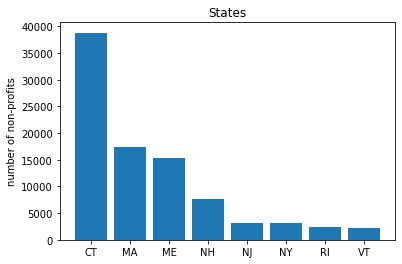

In [45]:
import matplotlib.pyplot as plt
labels = unique_states
xcoords = np.arange(len(labels))
height = []
for i in range(0, len(sorted_freqstate)):
    height.append(sorted_freqstate[i][1])
heights = height
plt.xticks(xcoords, labels)
plt.title('States')
plt.ylabel('number of non-profits')
plt.bar(xcoords, heights, 0.8, align="center")

This is a histogram visualization of how many non-profit organizations each of the Northeastern states have respectively, with the abbreviations of the states on the x-axis and the number of non-profits these states have on the y-axis.


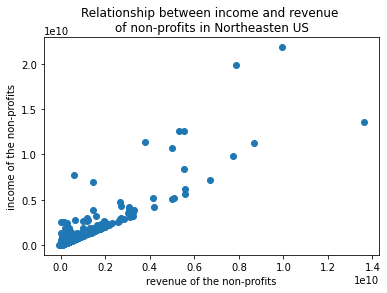

In [48]:
x = revenuenp
y = incomenp
plt.ylabel('income of the non-profits')
plt.xlabel('revenue of the non-profits')
plt.title('Relationship between income and revenue \nof non-profits in Northeasten US')
plt.scatter(x, y)

This is a scatter plot showing the relationship between the income of non-profits in Northeastern states in the United States and the revenue of theirs. It has the revenue of the non-profits on the x-axis and the income of theirs on the y-axis. It visualizes that for the majority of the non-profits, there exists a positive relationship between the income and revenue of a non-profit. Meanwhile, we can see some outliers on the chart with a higher proportion between income and revenue.

## Part 6 - Conclusion

TODO: write your conclusion here (interpret results of calculations; does it help answer your original questions?)

* From the calculations, we found that:
    * New york state and New york city are the state and city that have the most non-profits in Northeastern US.
    * The average income of a non-profit in Northeastern US is 9087179.03 dollars.


* The calculations were helpful for answering my original questions and brought along several interesting discoveries including but not limited to:
    * Massachusetts has more non-profits than New Jersey
    * There exists a rather proportional relationship between the income and revenue of non-profits
    * There are 257324 non-profit organizations in the mentioned 8 states.